In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras

In [5]:
path = 'creditcard.csv'
df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144662,86306,-1.159439,1.293311,1.665354,0.216017,0.277078,-0.097341,0.810287,0.228097,-0.393932,...,-0.044334,0.026481,-0.363068,0.091470,0.671527,-0.440231,-0.363294,-0.232516,9.99,0.0
144663,86307,0.127203,0.750928,-0.907181,-0.787828,2.098630,3.769405,-1.449344,-1.757987,-0.638194,...,-1.625143,-0.887240,0.037570,0.931982,0.892304,0.166069,-0.040906,0.134052,1.98,0.0
144664,86307,-1.256340,0.666847,0.857662,1.071812,-0.624798,0.329237,0.477858,0.502438,-0.291680,...,0.097908,0.428510,-0.175776,0.032314,-0.033240,-0.269483,0.257663,0.049923,150.57,0.0
144665,86308,-2.085957,2.132527,0.394236,-0.793308,0.560582,0.250669,0.898546,-0.087808,1.373166,...,-0.688234,-0.691653,-0.155321,-0.941042,0.082100,0.005104,-0.252739,-0.930140,8.92,0.0


In [6]:
df = df.drop(['Time','Class'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144662,-1.159439,1.293311,1.665354,0.216017,0.277078,-0.097341,0.810287,0.228097,-0.393932,-0.832010,...,-0.229775,-0.044334,0.026481,-0.363068,0.091470,0.671527,-0.440231,-0.363294,-0.232516,9.99
144663,0.127203,0.750928,-0.907181,-0.787828,2.098630,3.769405,-1.449344,-1.757987,-0.638194,-1.026294,...,0.713161,-1.625143,-0.887240,0.037570,0.931982,0.892304,0.166069,-0.040906,0.134052,1.98
144664,-1.256340,0.666847,0.857662,1.071812,-0.624798,0.329237,0.477858,0.502438,-0.291680,-0.253285,...,0.059655,0.097908,0.428510,-0.175776,0.032314,-0.033240,-0.269483,0.257663,0.049923,150.57
144665,-2.085957,2.132527,0.394236,-0.793308,0.560582,0.250669,0.898546,-0.087808,1.373166,2.614926,...,1.179889,-0.688234,-0.691653,-0.155321,-0.941042,0.082100,0.005104,-0.252739,-0.930140,8.92


In [7]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

In [8]:
print(x_train.shape[1])
print(x_test.shape[1])
type(x_train)

29
29


pandas.core.frame.DataFrame

In [9]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [10]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder
])

2024-11-12 23:03:47.268732: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [12]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

Epoch 1/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 232.7113 - val_loss: nan
Epoch 2/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 3.6019 - val_loss: nan
Epoch 3/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.5024 - val_loss: nan
Epoch 4/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.7370 - val_loss: nan
Epoch 5/5
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.8397 - val_loss: nan


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: >

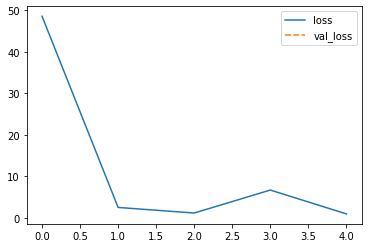

In [13]:
import seaborn as sns
sns.lineplot(model.history.history)

In [14]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [15]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

np.float64(0.9692096934819071)

In [16]:
anomalies = mse > threshold

In [17]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 1447


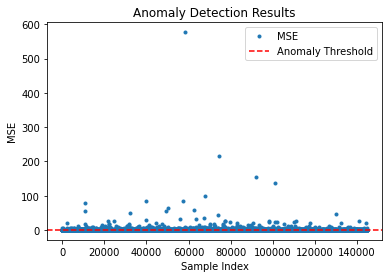

In [18]:
#Plot the anomalies
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

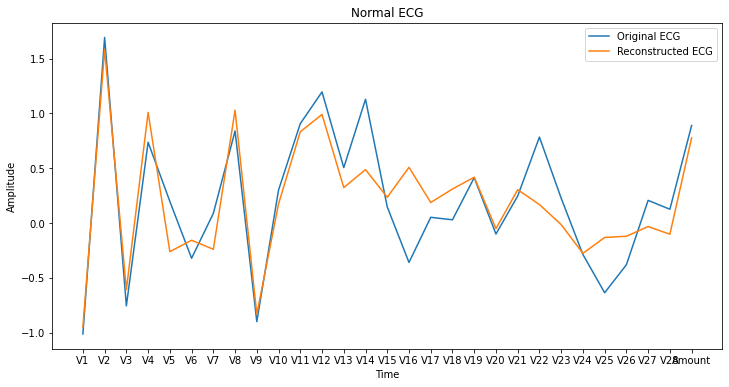

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

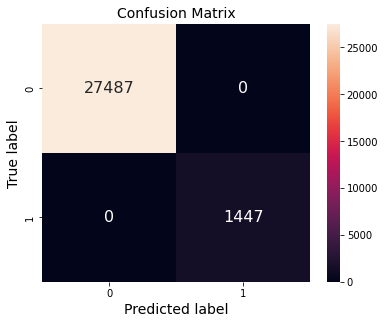

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()